In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import mylib as lib
pd.set_option('display.float_format', lambda x: '%.6f' % x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
returns = lib.readcsv('data\ind30_m_vw_rets.csv')
returns.columns = returns.columns.str.strip()

In [4]:
riskfree_rate = 0.03
annualized_vol = lib.annualized_vol(returns)
sharpe_ratio = lib.sharpe_ratio(returns, riskfree_rate)

In [7]:
miu = (riskfree_rate + annualized_vol*sharpe_ratio)/12

In [34]:
def gbm_0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, initial_price=100.0):
    """
    Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    total_steps = int(n_years * steps_per_year)
    xi = np.random.normal(size=(total_steps, n_scenarios))
    #print(xi)
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets= pd.DataFrame(rets)
    #print(rets)
    return initial_price * (1+rets).cumprod()


In [46]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, initial_price=100.0):
    """
    Geometric Brownian Motion model
    """
    dt = 1 / steps_per_year
    total_steps = int(n_years * steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(total_steps, n_scenarios))
    #print(xi)
    #print(rets)
    return initial_price * pd.DataFrame(rets_plus_1).cumprod()

In [35]:
%timeit gbm_0(n_years=10, n_scenarios=500)

4.07 ms ± 127 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
%timeit gbm(n_years=10, n_scenarios=500)

2.93 ms ± 35.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


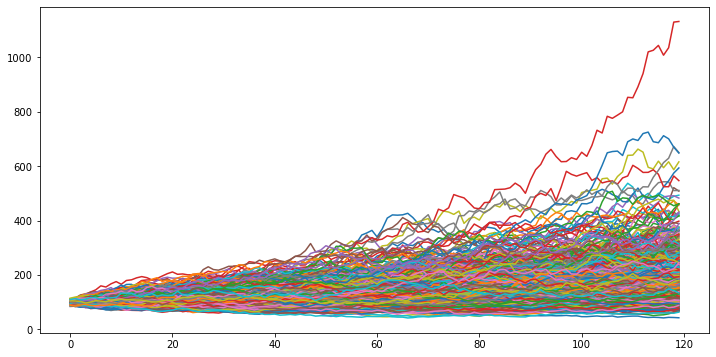

In [48]:
gbm(n_years=10, n_scenarios=500).plot(figsize=(12,6), legend=False)